In [1]:
!mkdir -p results

# Imports

#### General

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#### Tensorflow and NumPy

In [3]:
random_state = 1
import numpy as np
np.random.seed(random_state)
import random
random.seed(random_state)
import tensorflow
tensorflow.set_random_seed(random_state)

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


#### Sci-Kit Learn

In [4]:
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from sklearn.metrics import mean_squared_error

#### Keras

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers.advanced_activations import PReLU
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import Adam
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

Using TensorFlow backend.


#### Local

In [6]:
from bagging_regressor import BaggingRegressor

# Data

In [7]:
train = pd.read_csv('../feature_engineering/train.gz')
X_train = train[train.columns[:-1]].values
y_train = train[train.columns[-1]].values

In [8]:
test = pd.read_csv('../feature_engineering/test.gz')
X_test = test[test.columns[:-1]].values
y_test = test[test.columns[-1]].values

# Models

In [9]:
rf = RandomForestRegressor(
    bootstrap=False, 
    criterion='mse', 
    max_depth=None,
    max_features='sqrt', 
    max_leaf_nodes=None,
    min_impurity_decrease=0.001, 
    min_impurity_split=None,
    min_samples_leaf=8, 
    min_samples_split=8,
    min_weight_fraction_leaf=0.0, 
    n_estimators=17, 
    n_jobs=1,
    oob_score=False, 
    random_state=random_state, 
    verbose=0, 
    warm_start=False
)
rf

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.001, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [10]:
br = BayesianRidge(
    alpha_1=1, 
    alpha_2=1, 
    compute_score=False, 
    copy_X=True,
    fit_intercept=True, 
    lambda_1=1, 
    lambda_2=1.0, 
    n_iter=1,
    normalize=False, 
    tol=0.001, 
    verbose=False
)
br

BayesianRidge(alpha_1=1, alpha_2=1, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1, lambda_2=1.0, n_iter=1,
       normalize=False, tol=0.001, verbose=False)

In [11]:
gb = GradientBoostingRegressor(
    alpha=0.9, 
    criterion='friedman_mse', 
    init=None,
    learning_rate=0.3, 
    loss='ls', 
    max_depth=10, 
    max_features=None,
    max_leaf_nodes=100, 
    min_impurity_decrease=0.2,
    min_impurity_split=None, 
    min_samples_leaf=9,
    min_samples_split=3, 
    min_weight_fraction_leaf=0.0,
    n_estimators=21, 
    presort='auto', 
    random_state=random_state,
    subsample=1.0, 
    verbose=0, 
    warm_start=False
)
gb

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=100, min_impurity_decrease=0.2,
             min_impurity_split=None, min_samples_leaf=9,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=21, presort='auto', random_state=1,
             subsample=1.0, verbose=0, warm_start=False)

In [12]:
ensemble = BaggingRegressor([rf, br, gb])

In [13]:
ensemble.fit(X_train, y_train)

BaggingRegressor(regressors=[RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.001, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False), BayesianRidge(alpha_1=1, alpha_2=1, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1, lambda_2=1.0, n_iter=1,
       normalize=False, tol=0.001, verbose=False), GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=100, min_impurity_decrease=0.2,
             min_impurity_split=None, min_samples_leaf=9,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=21, presort='auto', random_state=1,
         

## Training Accuracy

In [14]:
train_pred = ensemble.predict(X_train)

In [15]:
train_err = mean_squared_error(y_train, train_pred)
train_err

25.349123548378692

In [16]:
train_df = pd.DataFrame([y_train, train_pred], index=['Truth', 'Predictions']).T

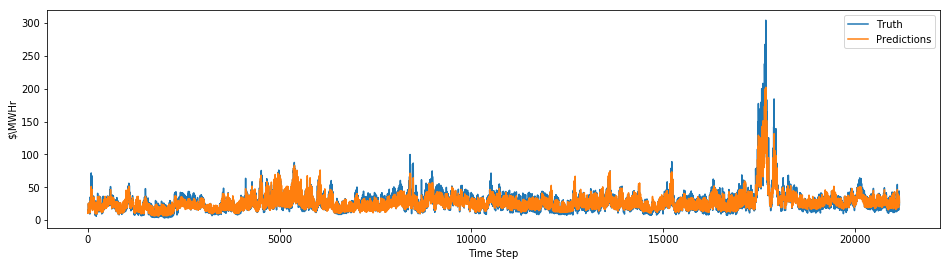

In [17]:
ax = train_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/bagging-train.pdf')
plt.savefig('results/bagging-train.svg')

## Testing Accuracy

In [18]:
test_pred = ensemble.predict(X_test)

In [19]:
test_err = mean_squared_error(y_test, test_pred)
test_err

32.20093146491588

In [20]:
test_df = pd.DataFrame([y_test, test_pred], index=['Truth', 'Predictions']).T

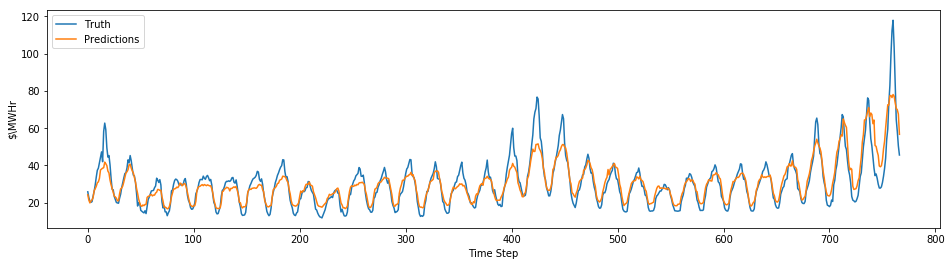

In [21]:
ax = test_df.plot(figsize=(16, 4))
ax.set_ylabel('$\MWHr')
ax.set_xlabel('Time Step')
plt.savefig('results/bagging-test.pdf')
plt.savefig('results/bagging-test.svg')

## Results

In [22]:
results = pd.Series([train_err, test_err], index=['Train', 'Test'])
results

Train    25.349124
Test     32.200931
dtype: float64

In [23]:
results.to_csv('results/bagging-mse.csv')